# Preprocessing

In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [251]:
import warnings
warnings.filterwarnings("ignore")

In [253]:
df = pd.read_csv('cleaned_churn_data.csv')
df.shape

(7032, 21)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   bool   
 2   Partner           7032 non-null   bool   
 3   Dependents        7032 non-null   bool   
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   bool   
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   bool   
 16  PaymentMethod     7032 non-null   object 


### Preprocessing

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [260]:
df.drop(columns=['customerID'],inplace=True)

In [276]:
df[['Partner','Dependents','PhoneService','PaperlessBilling','SeniorCitizen']].head()

,Partner,Dependents,PhoneService,PaperlessBilling,SeniorCitizen
0,True,False,False,True,False
1,False,False,True,False,False
2,False,False,True,True,False
3,False,False,False,False,False
4,False,False,True,True,False


In [274]:
df[['Partner','Dependents','PhoneService','PaperlessBilling','SeniorCitizen']] = df[['Partner','Dependents','PhoneService','PaperlessBilling','SeniorCitizen']].astype(bool)

In [280]:
#defing features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

In [282]:
#splitting data in traina nd test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [284]:
# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (5625, 19), X_test shape: (1407, 19)
y_train shape: (5625,), y_test shape: (1407,)


In [286]:
print(X_train.columns)
print(X_test.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [288]:
numerical_features=['tenure','MonthlyCharges','TotalCharges','SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling']
categorical_features = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Contract', 'PaymentMethod']

In [290]:
numerical_transformer = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant",fill_value="missing"),
    OneHotEncoder(drop='first',handle_unknown='ignore')
)

In [292]:
preprocessor = ColumnTransformer([
    ('num',numerical_transformer,numerical_features),
    ('cat',categorical_transformer,categorical_features)],
    remainder="passthrough",force_int_remainder_cols=False    
)

### MODEL DEVELOPMENT AND EVALUATION

In [295]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report

In [297]:
print(X_train.isnull().sum())  # Check missing values in features
print(y_train.isnull().sum())  # Check missing values in target

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
0


In [301]:
#logistic regression
logreg = make_pipeline(
    preprocessor,
    LogisticRegression(random_state=42)
)
logreg.fit(X_train,y_train)

y_pred_logreg = logreg.predict(X_test)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:,1] #probability of class 1(churn)

#evaluation
print("Logistic Regression performance:")
print(classification_report(y_test,y_pred_logreg))
print("ROC_AUC SCORE:",roc_auc_score(y_test,y_pred_prob_logreg))

Logistic Regression performance:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

ROC_AUC SCORE: 0.8360118754885567


In [311]:
logreg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'SeniorCitizen', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'PaperlessBilling'...
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender', 'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [305]:
#Random Forest Classifier 
rf = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=42)
)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]

#evaluation
print("Random Forest Performance:")
print(classification_report(y_test,y_pred_rf))
print("ROC_AUC score:",roc_auc_score(y_test,y_pred_prob_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC_AUC score: 0.8153669546671083


In [315]:
rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'SeniorCitizen', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'PaperlessBilling'...
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender', 'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [307]:
# Train XGBoost
xgb = make_pipeline(
    preprocessor,
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
)
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluate XGBoost
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407

ROC-AUC Score: 0.8141801823255044


In [317]:
xgb

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'SeniorCitizen', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'PaperlessBilling'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [321]:
#hyperparameter tuning Logistic Regression Model
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  
    'logisticregression__solver': ['liblinear', 'lbfgs', 'saga'],  
    'logisticregression__class_weight': [None, 'balanced']  
}

# Initialize GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(
    logreg,  
    param_grid,
    cv=8,  
    scoring='recall', 
    n_jobs=-1 
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Best Parameters: {'logisticregression__C': 10, 'logisticregression__class_weight': 'balanced', 'logisticregression__solver': 'liblinear'}
Best Recall Score: 0.8047014260249554


In [323]:
# Get the best model from GridSearchCV
best_logreg = grid_search.best_estimator_

# Predictions on the test set
y_pred_best_logreg = best_logreg.predict(X_test)
y_pred_proba_best_logreg = best_logreg.predict_proba(X_test)[:, 1]

# Classification report
print("\nTuned Logistic Regression Performance:")
print(classification_report(y_test, y_pred_best_logreg))

# ROC-AUC Score
roc_auc_best_logreg = roc_auc_score(y_test, y_pred_proba_best_logreg)
print(f"ROC-AUC: {roc_auc_best_logreg:.2f}")


Tuned Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

ROC-AUC: 0.83


### Final model

In [325]:
import joblib

# Save the model
joblib.dump(best_logreg, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [337]:
best_logreg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'SeniorCitizen', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'PaperlessBilling'...
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender', 'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('logisticregression',
                 LogisticRegression(C=10, class_weight='balanced',
                                    random_state=42, solver='liblinear'))])

In [347]:
# Get feature names from the preprocessor
feature_names = grid_search.best_estimator_.named_steps['columntransformer'].get_feature_names_out()

# Get coefficients from the logistic regression
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': grid_search.best_estimator_.named_steps['logisticregression'].coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Display the top features
print("Top Features Influencing Churn Prediction:")
print(coefficients)

Top Features Influencing Churn Prediction:
                                       Feature  Coefficient
11            cat__InternetService_Fiber optic     2.163577
22                        cat__StreamingTV_Yes     0.795945
24                    cat__StreamingMovies_Yes     0.782352
2                            num__TotalCharges     0.647081
10                      cat__MultipleLines_Yes     0.543346
28         cat__PaymentMethod_Electronic check     0.409447
18                   cat__DeviceProtection_Yes     0.277398
7                        num__PaperlessBilling     0.123708
6                            num__PhoneService     0.096265
16                       cat__OnlineBackup_Yes     0.093490
3                           num__SeniorCitizen     0.076085
27  cat__PaymentMethod_Credit card (automatic)     0.073305
29             cat__PaymentMethod_Mailed check     0.056678
8                             cat__gender_Male    -0.010412
4                                 num__Partner    -0.0204

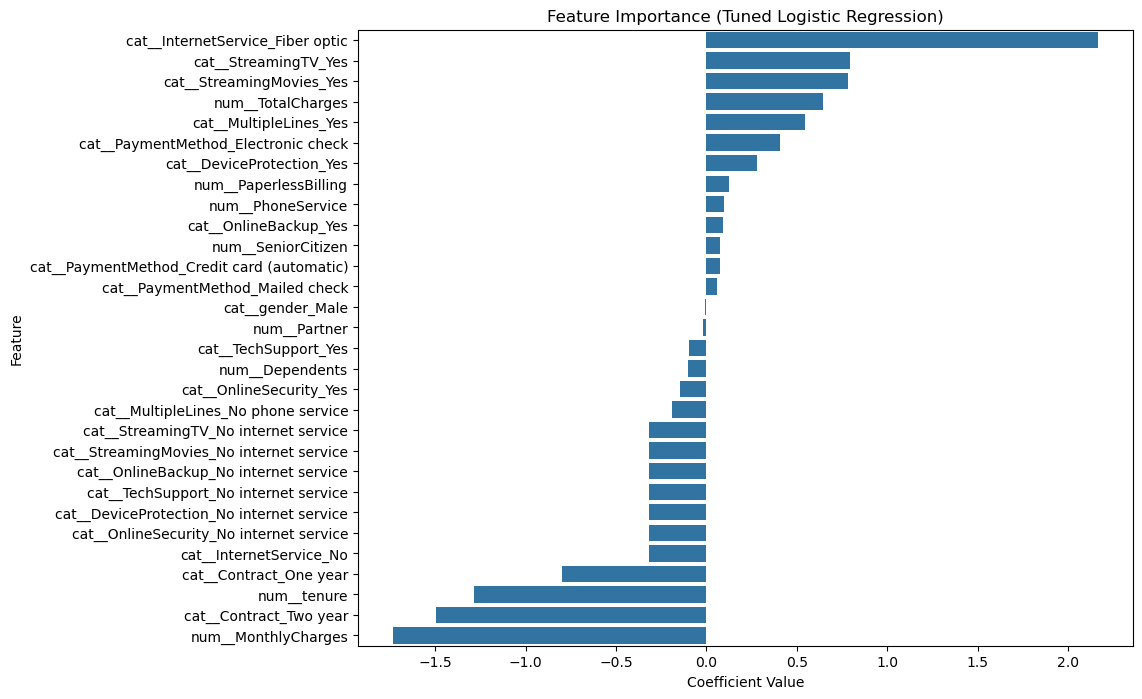

In [349]:
# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Feature Importance (Tuned Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

### Prediction on new data

In [384]:
new_data = pd.DataFrame({
    'customerID': ['1001'],
    'gender': ['Male'],
    'SeniorCitizen': [0],
    'Partner': ['Yes'],
    'Dependents': ['No'],
    'tenure': [12],
    'PhoneService': ['Yes'],
    'MultipleLines': ['No'],
    'InternetService': ['Fiber optic'],
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['No'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'StreamingTV': ['Yes'],
    'StreamingMovies': ['Yes'],
    'Contract': ['Month-to-month'],
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Electronic check'],
    'MonthlyCharges': [79.85],
    'TotalCharges': [958.2]
})

In [388]:
new_data.drop(columns=['customerID'], inplace=True)

# Map binary categorical variables ('Yes'/'No') to 1/0
new_data[['Partner','Dependents','PhoneService','PaperlessBilling','SeniorCitizen']] = new_data[['Partner','Dependents','PhoneService','PaperlessBilling','SeniorCitizen']].astype(bool)


In [390]:
loaded_model = joblib.load('logistic_regression_model.pkl')

In [392]:
predictions = loaded_model.predict(new_data)

print("Predicted Churn (0 = No, 1 = Yes):")
print(predictions)

# Predict probabilities
probabilities = loaded_model.predict_proba(new_data)[:, 1]
print("Probability of Churn:")
print(probabilities)

Predicted Churn (0 = No, 1 = Yes):
[1]
Probability of Churn:
[0.90096866]


# INSIGHTS

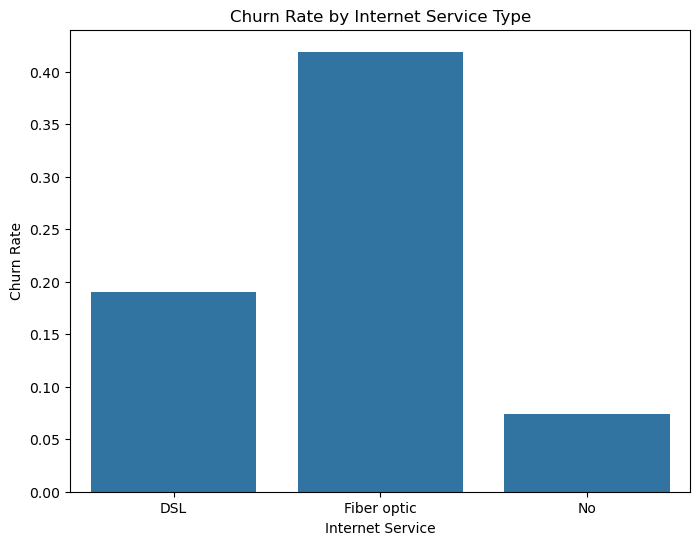

In [356]:
# Group by InternetService and calculate churn rate
churn_by_internet = df.groupby('InternetService')['Churn'].mean().reset_index()

# Plot churn rate by InternetService
plt.figure(figsize=(8, 6))
sns.barplot(x='InternetService', y='Churn', data=churn_by_internet)
plt.title("Churn Rate by Internet Service Type")
plt.xlabel("Internet Service")
plt.ylabel("Churn Rate")
plt.show()

#fiber optic customers are more likely to churn

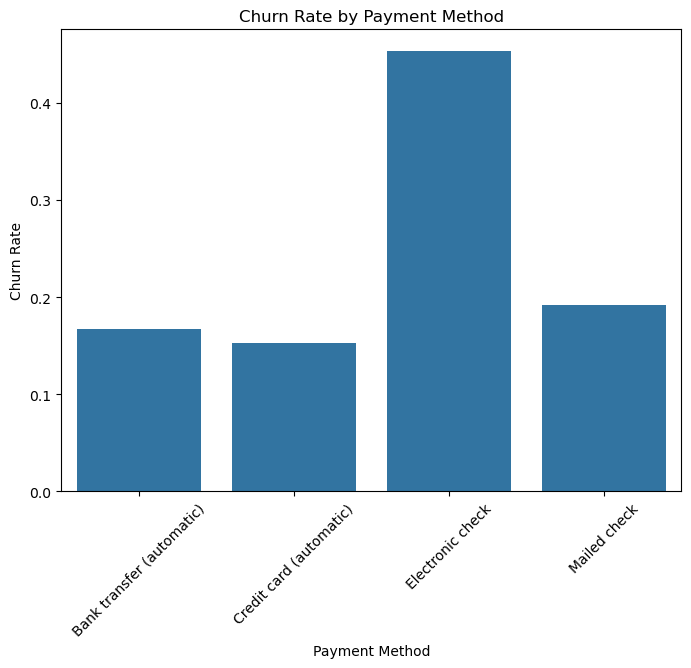

In [358]:
# Group by PaymentMethod and calculate churn rate
churn_by_payment = df.groupby('PaymentMethod')['Churn'].mean().reset_index()

# Plot churn rate by PaymentMethod
plt.figure(figsize=(8, 6))
sns.barplot(x='PaymentMethod', y='Churn', data=churn_by_payment)
plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.show()

#electronic check users are more likely to churn

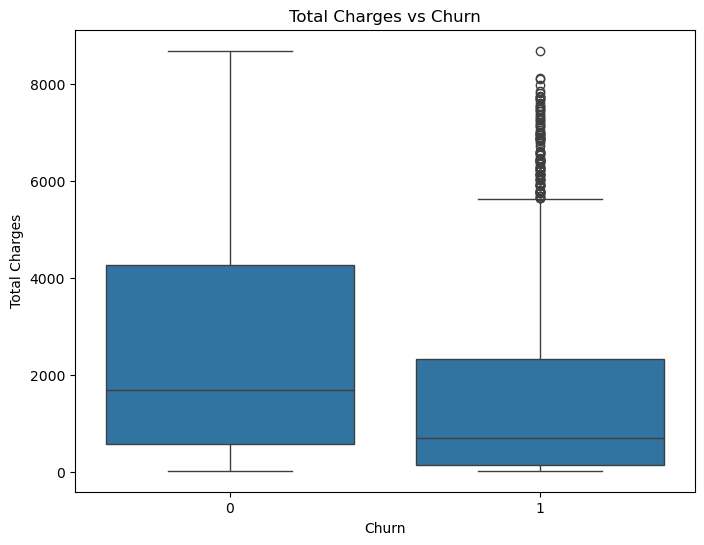

In [360]:
# Convert TotalCharges to numeric (if not already)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Plot TotalCharges vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.show()

#higher total charges increase churn risk

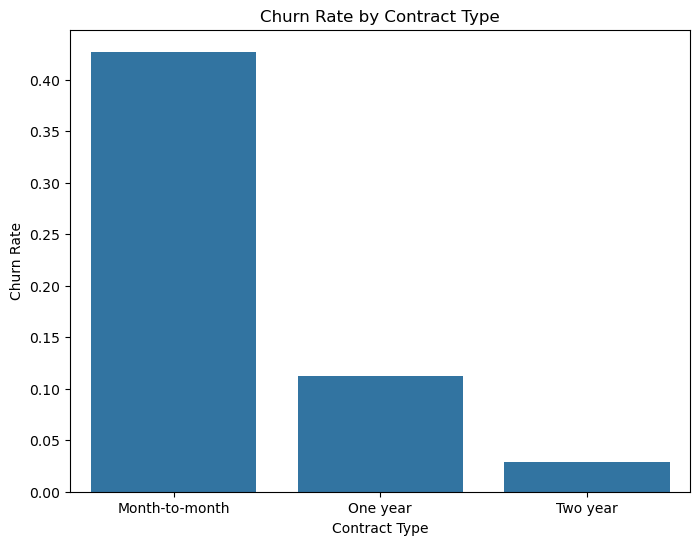

In [362]:
# Group by Contract and calculate churn rate
churn_by_contract = df.groupby('Contract')['Churn'].mean().reset_index()

# Plot churn rate by Contract
plt.figure(figsize=(8, 6))
sns.barplot(x='Contract', y='Churn', data=churn_by_contract)
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.show()

#long-term contracts reduce churn

### Prioritize High-Risk Customers
### Using the model’s probability scores, you can prioritize retention efforts for high-risk customers:

### High-Risk Customers (Probability > 0.7) :
### Immediate action is required.
### Offer personalized retention offers, such as discounts, free upgrades, or dedicated account managers.
### Moderate-Risk Customers (Probability 0.4–0.7) :
### Monitor closely and provide proactive support.
### Send targeted marketing campaigns highlighting the value of staying with the company.
### Low-Risk Customers (Probability < 0.4) :
### Focus on maintaining satisfaction through regular engagement and upselling opportunities.